In [1]:
import sys
import os

# Add the src directory to the Python path

sys.path.append('/Users/qianhuilin/Desktop/Envision/UTOPIA_package/utopia_package/src')
from utopia.microservice.generate_object.generate_object_app import *
from utopia.utopia import utopiaModel
from utopia.preprocessing.generate_rate_constants_json import *
from utopia.results_processing_json.process_results_json import *
from utopia.preprocessing.fill_interactions_df_json import *
from utopia.results_processing.mass_balance_check_json import *
from utopia.solver_steady_state_json import *
import pymongo
import json

In [2]:
# Load the default configuration and data from the 'data' folder.
data_data = utopiaModel.load_json_file("data/default_data.json")
config_data = utopiaModel.load_json_file("data/default_config.json")

In [3]:
# Pretty print with indentation
print("Loaded Configuration Data:")
print(json.dumps(config_data, indent=2))
print("\nLoaded Input Data:")
print(json.dumps(data_data, indent=2))

Loaded Configuration Data:
{
  "big_bin_diameter_um": 5000,
  "N_sizeBins": 5,
  "vol_algal_cell_m3": 2e-16,
  "spm_density_kg_m3": 1388,
  "boxName": "Utopia",
  "comp_input_file_name": "inputs_compartments.csv",
  "comp_interactFile_name": "compartment_interactions.csv",
  "MPforms_list": [
    "freeMP",
    "heterMP",
    "biofMP",
    "heterBiofMP"
  ],
  "solver": "SteadyState",
  "compartment_types": {
    "UTOPIA_surfaceSea_water_compartments": [
      "Ocean_Surface_Water",
      "Coast_Surface_Water"
    ],
    "UTOPIA_water_compartments": [
      "Ocean_Mixed_Water",
      "Ocean_Column_Water",
      "Coast_Column_Water",
      "Surface_Freshwater",
      "Bulk_Freshwater"
    ],
    "UTOPIA_deep_soil_compartments": [
      "Beaches_Deep_Soil",
      "Background_Soil",
      "Impacted_Soil"
    ],
    "UTOPIA_soil_surface_compartments": [
      "Beaches_Soil_Surface",
      "Background_Soil_Surface",
      "Impacted_Soil_Surface"
    ],
    "UTOPIA_sediment_compartment": [
  

### Insert initial data (config_data and data_data) into database 

In [4]:
# initialization of config_data and input_data
initialize_mongo_collections()

In [5]:

from datetime import datetime
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client['utopia']
config_collection = db['configure_data']
input_collection = db['input_data']
config_document = config_collection.insert_one(config_data)
input_document = input_collection.insert_one(data_data)

In [6]:
# Clear the model_json collection
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client['utopia']
model_json_collection = db["model_json"]
model_json_collection.delete_many({}) 

DeleteResult({'n': 1, 'ok': 1.0}, acknowledged=True)

### generate_objects

In [7]:
from bson import json_util

model_json = create_model_json()
generate_coding_dictionaries()
print("\nModel JSON:")
print(json_util.dumps(model_json, indent=2))
print("\nType of model_json['particles_df']:", type(model_json["particles_df"]))

Model JSON created and inserted into MongoDB collection 'model_json'.

Model JSON:
{
  "MPdensity_kg_m3": 980,
  "MP_composition": "PE",
  "shape": "sphere",
  "MP_form": "freeMP",
  "big_bin_diameter_um": 5000,
  "N_sizeBins": 5,
  "FI": 0.5,
  "t_half_deg_free": 66000,
  "t_frag_gen_FreeSurfaceWater": 36.5,
  "heter_deg_factor": 10,
  "biof_deg_factor": 0.5,
  "factor_deepWater_soilSurface": 10,
  "factor_sediment": 100,
  "biof_frag_factor": 2,
  "heter_frag_factor": 100,
  "vol_algal_cell_m3": 2e-16,
  "spm_density_kg_m3": 1388,
  "comp_input_file_name": "inputs_compartments.csv",
  "comp_interactFile_name": "compartment_interactions.csv",
  "boxName": "Utopia",
  "MPforms_list": [
    "freeMP",
    "heterMP",
    "biofMP",
    "heterBiofMP"
  ],
  "compartments_list": [
    "Ocean_Surface_Water",
    "Ocean_Mixed_Water",
    "Ocean_Column_Water",
    "Coast_Surface_Water",
    "Coast_Column_Water",
    "Surface_Freshwater",
    "Bulk_Freshwater",
    "Sediment_Freshwater",
    "Se

In [8]:
print(compartment_surfaceSea_water.__module__)
print(compartment_surfaceSea_water.__dict__.keys())


utopia.objects.compartment_classes_json
dict_keys(['__module__', '__init__', 'to_json', 'to_dict', '__doc__'])


In [9]:
(
        system_particle_object_list_json,
        SpeciesList,
        spm_dict,
        dict_comp,
        particles_properties_df_dict
) = generate_objects_json(model_json)



Assigned Ocean_Surface_Water volume: 1630000000000000.0 m3
Assigned Ocean_Mixed_Water volume: 3.26e+16 m3
Assigned Ocean_Column_Water volume: 1.31e+18 m3
Assigned Coast_Surface_Water volume: 67100000000000.0 m3
Assigned Coast_Column_Water volume: 1340000000000000.0 m3
Assigned Surface_Freshwater volume: 9050000000000.0 m3
Assigned Bulk_Freshwater volume: 90500000000000.0 m3
Assigned Sediment_Freshwater volume: 905000000000.0 m3
Assigned Sediment_Ocean volume: 9790000000000.0 m3
Assigned Sediment_Coast volume: 2680000000000.0 m3
Assigned Beaches_Soil_Surface volume: 3440.0 m3
Assigned Beaches_Deep_Soil volume: 34400.0 m3
Assigned Background_Soil_Surface volume: 873000000000.0 m3
Assigned Background_Soil volume: 8730000000000.0 m3
Assigned Impacted_Soil_Surface volume: 607000000000.0 m3
Assigned Impacted_Soil volume: 6070000000000.0 m3
Assigned Air volume: 3.06E+18 m3
modleBoxes:  [{'Bname': 'Utopia', 'Bdepth_m': None, 'Blength_m': None, 'Bwidth_m': None, 'Bvolume_m3': None, 'Bconexions'

In [10]:
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client['utopia']
model_json_collection = db["model_json"]

# Update or insert the document with the new data
model_json_collection.find_one_and_update(
	{},  # filter (empty to match any document)
	{
		"$set": {
			"system_particle_object_list": system_particle_object_list_json,
			"SpeciesList": SpeciesList,
			"spm": spm_dict,
			"dict_comp": dict_comp,
			"particles_properties_df": particles_properties_df_dict
		}
	},
	upsert=True
)

{'_id': ObjectId('686146476ad3e0e9eb4ad53f'),
 'MPdensity_kg_m3': 980,
 'MP_composition': 'PE',
 'shape': 'sphere',
 'MP_form': 'freeMP',
 'big_bin_diameter_um': 5000,
 'N_sizeBins': 5,
 'FI': 0.5,
 't_half_deg_free': 66000,
 't_frag_gen_FreeSurfaceWater': 36.5,
 'heter_deg_factor': 10,
 'biof_deg_factor': 0.5,
 'factor_deepWater_soilSurface': 10,
 'factor_sediment': 100,
 'biof_frag_factor': 2,
 'heter_frag_factor': 100,
 'vol_algal_cell_m3': 2e-16,
 'spm_density_kg_m3': 1388,
 'comp_input_file_name': 'inputs_compartments.csv',
 'comp_interactFile_name': 'compartment_interactions.csv',
 'boxName': 'Utopia',
 'MPforms_list': ['freeMP', 'heterMP', 'biofMP', 'heterBiofMP'],
 'compartments_list': ['Ocean_Surface_Water',
  'Ocean_Mixed_Water',
  'Ocean_Column_Water',
  'Coast_Surface_Water',
  'Coast_Column_Water',
  'Surface_Freshwater',
  'Bulk_Freshwater',
  'Sediment_Freshwater',
  'Sediment_Ocean',
  'Sediment_Coast',
  'Beaches_Soil_Surface',
  'Beaches_Deep_Soil',
  'Background_Soil

In [11]:
model_json = model_json_collection.find_one()
for key in model_json.keys():
    print(key)

model_id = model_json['_id']

_id
MPdensity_kg_m3
MP_composition
shape
MP_form
big_bin_diameter_um
N_sizeBins
FI
t_half_deg_free
t_frag_gen_FreeSurfaceWater
heter_deg_factor
biof_deg_factor
factor_deepWater_soilSurface
factor_sediment
biof_frag_factor
heter_frag_factor
vol_algal_cell_m3
spm_density_kg_m3
comp_input_file_name
comp_interactFile_name
boxName
MPforms_list
compartments_list
solver
compartment_types
radius_algae_m
spm_radius_um
emiss_dict_g_s
particles_df
base_path
MP_form_dict_reverse
comp_dict_inverse
dict_size_coding
particle_compartmentCoding
particle_forms_coding
size_dict
SpeciesList
dict_comp
particles_properties_df
spm
system_particle_object_list


In [12]:
print(model_json["dict_comp"]["Ocean_Surface_Water"])
print("\nSystem Particle Object List JSON:")
print(json.dumps(system_particle_object_list_json, indent=2))
print("\nSpecies List:")
print(json.dumps(SpeciesList, indent=2))
print("\nSPM Dictionary:")
print(json.dumps(spm_dict, indent=2))
print("\nComposition Dictionary:")
print(json.dumps(dict_comp, indent=2))
print("\nParticles Properties DataFrame Dictionary:")
print(json.dumps(particles_properties_df_dict, indent=2))
print("\nModel JSON:")
print()

{'Cname': 'Ocean_Surface_Water', 'Cdepth_m': 5.0, 'Clength_m': None, 'Cwidth_m': None, 'Cvolume_m3': 1630000000000000.0, 'CsurfaceArea_m2': 326000000000000.0, 'particles': {'freeMP': [], 'heterMP': [], 'biofMP': [], 'heterBiofMP': []}, 'processess': ['discorporation', 'fragmentation', 'heteroaggregation', 'heteroaggregate_breackup', 'biofouling', 'defouling', 'advective_transport', 'settling', 'rising', 'mixing', 'sea_spray_aerosol', 'beaching'], 'connexions': {'Ocean_Mixed_Water': ['settling', 'mixing'], 'Coast_Surface_Water': 'advective_transport', 'Air': 'sea_spray_aerosol'}, 'SPM_mgL': 1.0, 'flowVelocity_m_s': 0.03, 'waterFlow_m3_s': 67100000.0, 'T_K': 278.0, 'G': 1.0, 'compartment_type': 'surfaceSea_water', 'Ccode': 1}

System Particle Object List JSON:
[
  {
    "Pcomposition": "PE",
    "Pdensity_kg_m3": 980.0,
    "PdimensionX_m": 2.5e-07,
    "PdimensionX_um": 0.25,
    "PdimensionY_m": 2.5e-07,
    "PdimensionY_um": 0.25,
    "PdimensionZ_m": 2.5e-07,
    "PdimensionZ_um": 0.

### Generate Rate Constants

In [13]:
model_json_updated = generate_rate_constants_json(model_json)
print("Generated rate constants for model particles.")

Generated rate constants for model particles.


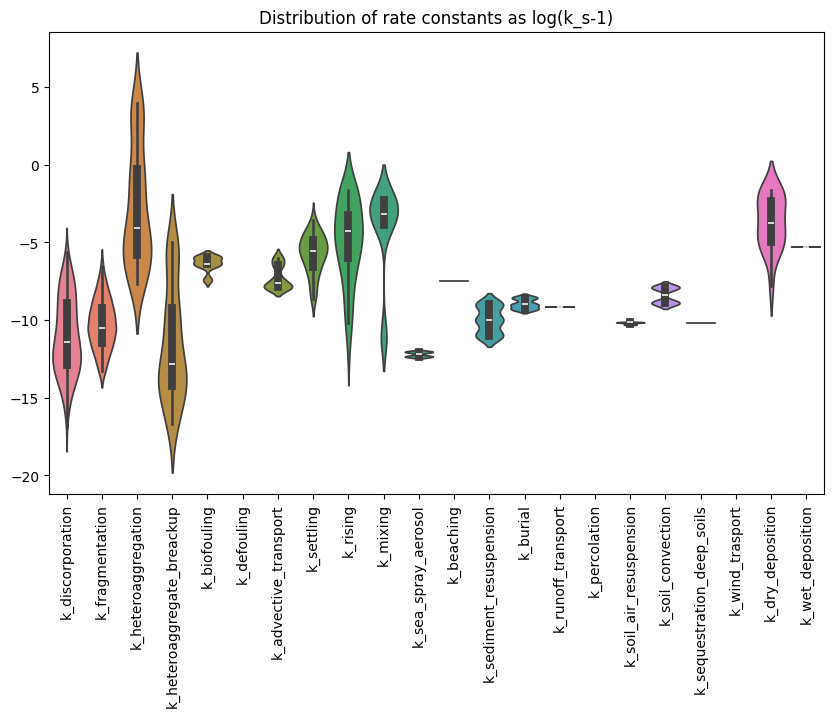

<Figure size 640x480 with 0 Axes>

In [14]:

plot_rateConstants_json(model_json_updated)

update model_json document in mongodb

In [15]:
model_json_collection.update_one(
    {'_id': model_id},     
    {'$set': model_json_updated}    
)

print("Updated model_json in MongoDB.")

Updated model_json in MongoDB.


In [16]:
model_json = model_json_collection.find_one({'_id': model_id})
system_particle_object_list = model_json["system_particle_object_list"]
SpeciesList = model_json["SpeciesList"]
dict_comp = model_json["dict_comp"]

In [17]:
interaction_collection = db["interaction"]
interaction_collection.delete_many({})

DeleteResult({'n': 1, 'ok': 1.0}, acknowledged=True)

In [18]:
interaction_collection = db["interaction"]
doc = interaction_collection.insert_one({"model_id": model_id})
inserted_id = doc.inserted_id
interaction_documentation = interaction_collection.find_one({"_id": inserted_id})
interaction_id = interaction_documentation["_id"]

In [19]:
interaction_df = fillInteractions_fun_OOP_json(system_particle_object_list, SpeciesList, dict_comp).to_dict()

In [20]:
print(json.dumps(interaction_df, indent=2))

{
  "aA0_Utopia": {
    "aA0_Utopia": -0.0027612210423610534,
    "bA0_Utopia": 0.0,
    "cA0_Utopia": 0.0,
    "dA0_Utopia": 0.0,
    "eA0_Utopia": 0.0,
    "aB0_Utopia": 2.246885287461167e-08,
    "bB0_Utopia": 0.0,
    "cB0_Utopia": 0.0,
    "dB0_Utopia": 0.0,
    "eB0_Utopia": 0.0,
    "aC0_Utopia": 1.1574074074074074e-06,
    "bC0_Utopia": 0.0,
    "cC0_Utopia": 0.0,
    "dC0_Utopia": 0.0,
    "eC0_Utopia": 0.0,
    "aD0_Utopia": 0.0,
    "bD0_Utopia": 0.0,
    "cD0_Utopia": 0.0,
    "dD0_Utopia": 0.0,
    "eD0_Utopia": 0.0,
    "aA1_Utopia": 0.00276,
    "bA1_Utopia": 0.0,
    "cA1_Utopia": 0.0,
    "dA1_Utopia": 0.0,
    "eA1_Utopia": 0.0,
    "aB1_Utopia": 0.0,
    "bB1_Utopia": 0.0,
    "cB1_Utopia": 0.0,
    "dB1_Utopia": 0.0,
    "eB1_Utopia": 0.0,
    "aC1_Utopia": 0.0,
    "bC1_Utopia": 0.0,
    "cC1_Utopia": 0.0,
    "dC1_Utopia": 0.0,
    "eC1_Utopia": 0.0,
    "aD1_Utopia": 0.0,
    "bD1_Utopia": 0.0,
    "cD1_Utopia": 0.0,
    "dD1_Utopia": 0.0,
    "eD1_Utopia": 0.0,


In [21]:
interaction_collection.update_one(
    {"_id": inserted_id},  # Query for the document you just inserted
    {"$set": {"interaction_df": interaction_df}}  # Set the new field
)

UpdateResult({'n': 1, 'nModified': 1, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

In [22]:
for p in system_particle_object_list:
            if "SPM" in p["Pname"]:
                if "BF" in p["Pname"]:
                        print(json.dumps(p, indent=2))

{
  "Pname": "mp1_BF_SPM",
  "Pcomposition": "PE",
  "species": "particulate",
  "Pform": "heterBiofMP",
  "t_half_d": 50000,
  "parentMP": {
    "Pname": "mp1_BF",
    "Pcomposition": "PE",
    "Pform": "biofMP",
    "species": "particulate",
    "parentMP": {
      "Pcomposition": "PE",
      "Pdensity_kg_m3": 980.0,
      "PdimensionX_m": 2.5e-07,
      "PdimensionX_um": 0.25,
      "PdimensionY_m": 2.5e-07,
      "PdimensionY_um": 0.25,
      "PdimensionZ_m": 2.5e-07,
      "PdimensionZ_um": 0.25,
      "Pemiss_t_y": 0,
      "Pform": "freeMP",
      "Pname": "mp1",
      "Pnumber_t0": null,
      "Pshape": "sphere",
      "diameter_m": 5e-07,
      "diameter_um": 0.5,
      "radius_m": 2.5e-07,
      "t_half_d": 5000,
      "Pvolume_m3": 6.544984694978735e-20,
      "CSF": 1
    },
    "BF_density_kg_m3": 1388,
    "BF_thickness_um": 3.627831678597812,
    "radius_m": 3.8778316785978124e-06,
    "diameter_m": 7.755663357195625e-06,
    "diameter_um": 7.755663357195625,
    "t_half

In [23]:
interaction_documentation = interaction_collection.find_one({"_id": interaction_id})
(R, PartMass_t0, input_flows_g_s, input_flows_num_s,model_json_updated_2) = solver_SS_json(model_json,interaction_documentation)
for i, idx in zip(R["mass_g"], R.index):
    if i < 0:
        print("negative values in the solution for " + idx)
    else:
        pass
# 把 R 插入data collection “result”
# update model_json
# 把 input_flows_g_s 和 input_flows_num_s 插入 collection “flow”



In [24]:
model_json_collection.update_one(
    {'_id': model_id},     
    {'$set': model_json_updated_2}    
)

print("Updated model_json in MongoDB. (2.0)")

Updated model_json in MongoDB. (2.0)


In [25]:
print ("type of R:", type(R))
print("type of input_flows_g_s:", type(input_flows_g_s))
print("type of input_flows_num_s:", type(input_flows_num_s))

type of R: <class 'pandas.core.frame.DataFrame'>
type of input_flows_g_s: <class 'dict'>
type of input_flows_num_s: <class 'dict'>


In [26]:
result_collection = db['result']
flow_collection = db['flow']

# Delete all documents in both collections
result_collection.delete_many({})
flow_collection.delete_many({})

print("Both 'result' and 'flow' collections have been initialized (all documents deleted).")

Both 'result' and 'flow' collections have been initialized (all documents deleted).


In [27]:
result_collection = db['result']
result_collection.insert_one({
    'model_id': model_id,
    'result': R.to_dict('list'),
    'index': list(R.index)
})


InsertOneResult(ObjectId('686146486ad3e0e9eb4ad543'), acknowledged=True)

In [28]:
flow_collection = db['flow']

flow_doc = {
    'model_id': model_id,
    'input_flows_g_s': input_flows_g_s,
    'input_flows_num_s': input_flows_num_s
}

flow_collection.insert_one(flow_doc)

InsertOneResult(ObjectId('686146486ad3e0e9eb4ad544'), acknowledged=True)

### Calculate mass balance

In [29]:
R_document = result_collection.find_one({'model_id':model_id})
for key in R_document["result"].keys():
    print(key)

mass_g
number_of_particles
concentration_g_m3
concentration_num_m3


In [30]:
print("type of R_document(mass_g):", type(R_document["result"]["mass_g"]))

type of R_document(mass_g): <class 'list'>


In [31]:
flow_document = flow_collection.find_one({'model_id':model_id})
for key in flow_document.keys():
    print(key)

_id
model_id
input_flows_g_s
input_flows_num_s


In [32]:
model_json = model_json_collection.find_one({'_id': model_id})

R_document = result_collection.find_one({'model_id':model_id})
massBalance_json(model_json, R_document, flow_document)

Difference inflow-outflow = -1.3217515970609384e-10


'-1.3217515970609384e-10'

In [33]:
(updated_model_json_surfComp_list,updated_system_particle_object_list, updated_flow) = estimate_flows_json(model_json,flow_document)

In [34]:
model_json_collection.update_one(
    {'_id': model_id},
    {
        '$set': {
            'system_particle_object_list': updated_system_particle_object_list,
            'surfComp_list': updated_model_json_surfComp_list
        }
    }
)

UpdateResult({'n': 1, 'nModified': 1, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

In [35]:
for key in updated_flow.keys():
    print(key)

_id
model_id
input_flows_g_s
input_flows_num_s
tables_outputFlows_mass
tables_outputFlows_number
tables_inputFlows_mass
tables_inputFlows_number


In [36]:
flow_updated_2 = generate_flows_dict_json(model_json,updated_flow)

In [37]:
for key in flow_updated_2.keys():
    print(key)

_id
model_id
input_flows_g_s
input_flows_num_s
tables_outputFlows_mass
tables_outputFlows_number
tables_inputFlows_mass
tables_inputFlows_number
flows_dict_mass
flows_dict_number


In [38]:


def convert_dfs_in_flow(flow_to_convert):
    flow = flow_to_convert #保留了原来的
    # Keys with dicts of DataFrames
    keys_with_dfs = [
        "tables_outputFlows_mass",
        "tables_outputFlows_number",
        "tables_inputFlows_mass",
        "tables_inputFlows_number"
    ]
    for key in keys_with_dfs:
        if key in flow and isinstance(flow[key], dict):
            for subkey, value in flow[key].items():
                if isinstance(value, pd.DataFrame):
                    flow[key][subkey] = value.to_dict(orient='records')
                    
    # Check flows_dict_mass and flows_dict_number if they exist
    for main_key in ["flows_dict_mass", "flows_dict_number"]:
        if main_key in flow and isinstance(flow[main_key], dict):
            for direction in ["input_flows", "output_flows"]:
                if direction in flow[main_key] and isinstance(flow[main_key][direction], dict):
                    for comp, value in flow[main_key][direction].items():
                        if isinstance(value, pd.DataFrame):
                            flow[main_key][direction][comp] = value.to_dict(orient='records')
    return flow

# Usage
# flow_serializable = convert_dfs_in_flow(updated_flow)
# Now insert flow_serializable to MongoDB!


In [39]:
flow_for_insert = convert_dfs_in_flow(flow_updated_2)

In [40]:
flow_collection.update_one(
    {'model_id': model_id},     
    {'$set': flow_for_insert}    
)


UpdateResult({'n': 1, 'nModified': 1, 'ok': 1.0, 'updatedExisting': True}, acknowledged=True)

In [41]:
R_document = result_collection.find_one({'model_id':model_id})
for key in R_document.keys():
    print(key)

_id
model_id
result
index


In [42]:
model_json = model_json_collection.find_one({'_id': model_id})
flow_document = flow_collection.find_one({'model_id':model_id})


In [43]:
print(model_json["comp_dict_inverse"])

{'0': 'Ocean_Surface_Water', '1': 'Ocean_Mixed_Water', '2': 'Ocean_Column_Water', '3': 'Coast_Surface_Water', '4': 'Coast_Column_Water', '5': 'Surface_Freshwater', '6': 'Bulk_Freshwater', '7': 'Sediment_Freshwater', '8': 'Sediment_Ocean', '9': 'Sediment_Coast', '10': 'Beaches_Soil_Surface', '11': 'Beaches_Deep_Soil', '12': 'Background_Soil_Surface', '13': 'Background_Soil', '14': 'Impacted_Soil_Surface', '15': 'Impacted_Soil', '16': 'Air'}


In [44]:
result_processed = process_results_json(model_json,R_document,flow_document)

Index sample: ['aA0_Utopia', 'bA0_Utopia', 'cA0_Utopia', 'dA0_Utopia', 'eA0_Utopia']
Type of index[0]: <class 'str'>


In [46]:
print(type(result_processed))
for key in result_processed.keys():
    print(key)

<class 'dict'>
_id
model_id
result
index
Results_extended
processed_results


In [47]:
for key in result_processed["result"].keys():
    print(key)

mass_g
number_of_particles
concentration_g_m3
concentration_num_m3
Size_Fraction_um
MP_Form
Compartment


In [48]:
result_processed["Results_extended"]

Compartment      MP_Form  Size_Fraction_um    mass_g  \
aA0_Utopia   Ocean_Surface_Water       freeMP               0.5  0.006747   
bA0_Utopia   Ocean_Surface_Water       freeMP               5.0  0.001334   
cA0_Utopia   Ocean_Surface_Water       freeMP              50.0  0.000057   
dA0_Utopia   Ocean_Surface_Water       freeMP             500.0  0.000002   
eA0_Utopia   Ocean_Surface_Water       freeMP            5000.0  0.286071   
...                          ...          ...               ...       ...   
aD16_Utopia                  Air  heterBiofMP               0.5  2.925324   
bD16_Utopia                  Air  heterBiofMP               5.0  0.437256   
cD16_Utopia                  Air  heterBiofMP              50.0  0.046705   
dD16_Utopia                  Air  heterBiofMP             500.0  0.060319   
eD16_Utopia                  Air  heterBiofMP            5000.0  0.045247   

             number_of_particles  concentration_g_m3  concentration_num_m3  \
aA0_Utopia          1.051975e+11        4.139544e-18          6.453835e-05   
bA0_Utopia          2.079198e+07        8.181687e-19          1.275581e-08   
cA0_Utopia          8.831652e+02        3.475274e-20          5.418191e-13   
dA0_Utopia          2.835789e-02        1.115889e-21          1.739748e-17   
eA0_Utopia          4.460042e+00        1.755036e-16          2.736222e-15   
...                          ...                 ...                   ...   
aD16_Utopia         4.560782e+13        9.559883e-19          1.490451e-05   
bD16_Utopia         6.817128e+09        1.428942e-19          2.227820e-09   
cD16_Utopia         7.281600e+05        1.526301e-20          2.379608e-13   
dD16_Utopia         9.404173e+02        1.971215e-20          3.073259e-16   
eD16_Utopia         7.054303e-01        1.478657e-20          2.305328e-19   

             mass_fraction  number_fraction  \
aA0_Utopia    2.812503e-12     5.682176e-12   
bA0_Utopia    5.558829e-13     1.123065e-15   
cA0_Utopia    2.361182e-14     4.770361e-20   
dA0_Utopia    7.581609e-16     1.531733e-24   
eA0_Utopia    1.192412e-10     2.409063e-22   
...                    ...              ...   
aD16_Utopia   1.219346e-09     2.463477e-09   
bD16_Utopia   1.822590e-10     3.682228e-13   
cD16_Utopia   1.946769e-11     3.933110e-17   
dD16_Utopia   2.514248e-11     5.079604e-20   
eD16_Utopia   1.886000e-11     3.810337e-23   

                                                   inflows_g_s  \
aA0_Utopia   {'k_fragmentation': 6.349928936383128e-08, 'k_...   
bA0_Utopia   {'k_fragmentation': 1.3606974646688516e-08, 'k...   
cA0_Utopia   {'k_fragmentation': 9.071260400802882e-09, 'k_...   
dA0_Utopia   {'k_fragmentation': 4.535624432710793e-09, 'k_...   
eA0_Utopia   {'k_fragmentation': 0.0, 'k_heteroaggregate_br...   
...                                                        ...   
aD16_Utopia  {'k_sea_spray_aerosol': 2.4671802084903417e-08...   
bD16_Utopia  {'k_sea_spray_aerosol': 3.528230552136636e-09,...   
cD16_Utopia  {'k_sea_spray_aerosol': 8.653488173289239e-10,...   
dD16_Utopia  {'k_sea_spray_aerosol': 2.433365331973693e-06,...   
eD16_Utopia  {'k_sea_spray_aerosol': 0.00016228072878652044...   

                                                 inflows_num_s  \
aA0_Utopia   {'k_fragmentation': 0.0065954833455778876, 'k_...   
bA0_Utopia   {'k_fragmentation': 1.6125695794675312e-06, 'k...   
cA0_Utopia   {'k_fragmentation': 1.4160685811297995e-07, 'k...   
dA0_Utopia   {'k_fragmentation': 7.071350678931882e-08, 'k_...   
eA0_Utopia   {'k_fragmentation': 0.0, 'k_heteroaggregate_br...   
...                                                        ...   
aD16_Utopia  {'k_sea_spray_aerosol': 9.018244592281231, 'k_...   
bD16_Utopia  {'k_sea_spray_aerosol': 0.633657124586848, 'k_...   
cD16_Utopia  {'k_sea_spray_aerosol': 0.005504809073760982, ...   
dD16_Utopia  {'k_sea_spray_aerosol': 0.034214831239942636, ...   
eD16_Utopia  {'k_sea_spray_aerosol': 0.0025036421608932943,...   

        

此处需要更新 result["result"], result ["Results_extended"] (这里用sql数据库更方便)


/Users/qianhuilin/Library/Caches/pypoetry/virtualenvs/utopia-DHOqgSej-py3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


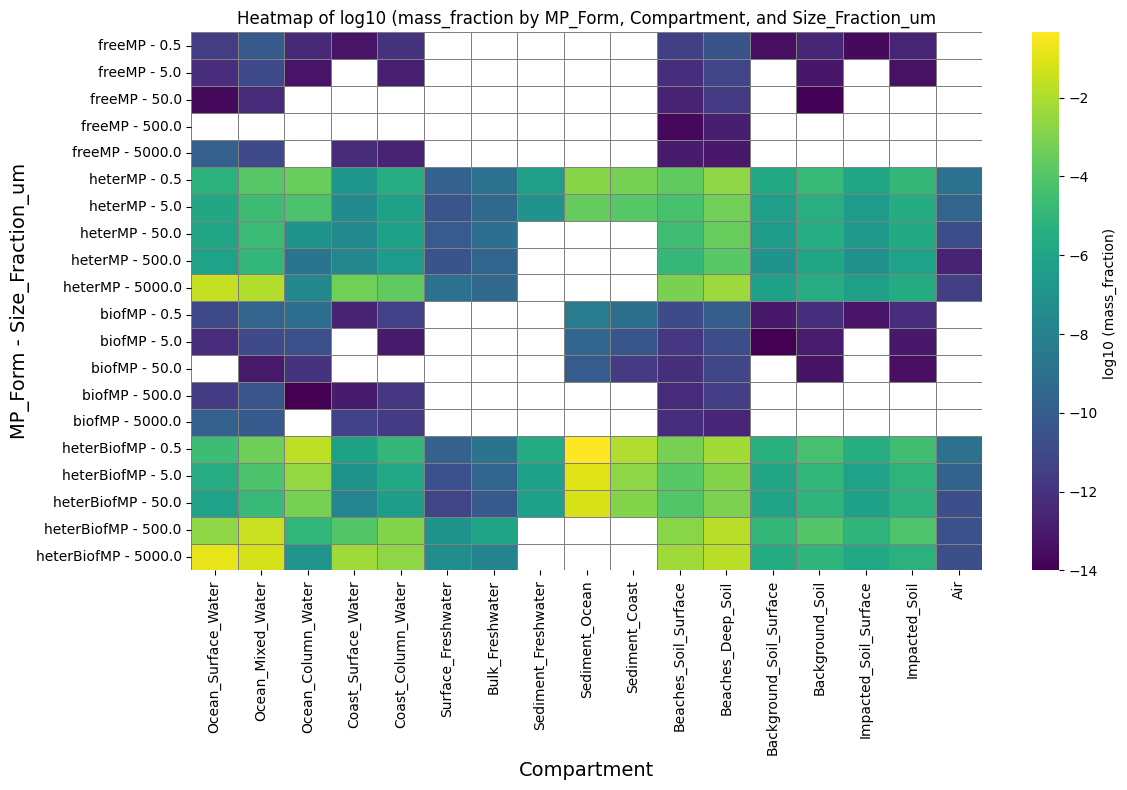

/Users/qianhuilin/Library/Caches/pypoetry/virtualenvs/utopia-DHOqgSej-py3.9/lib/python3.9/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


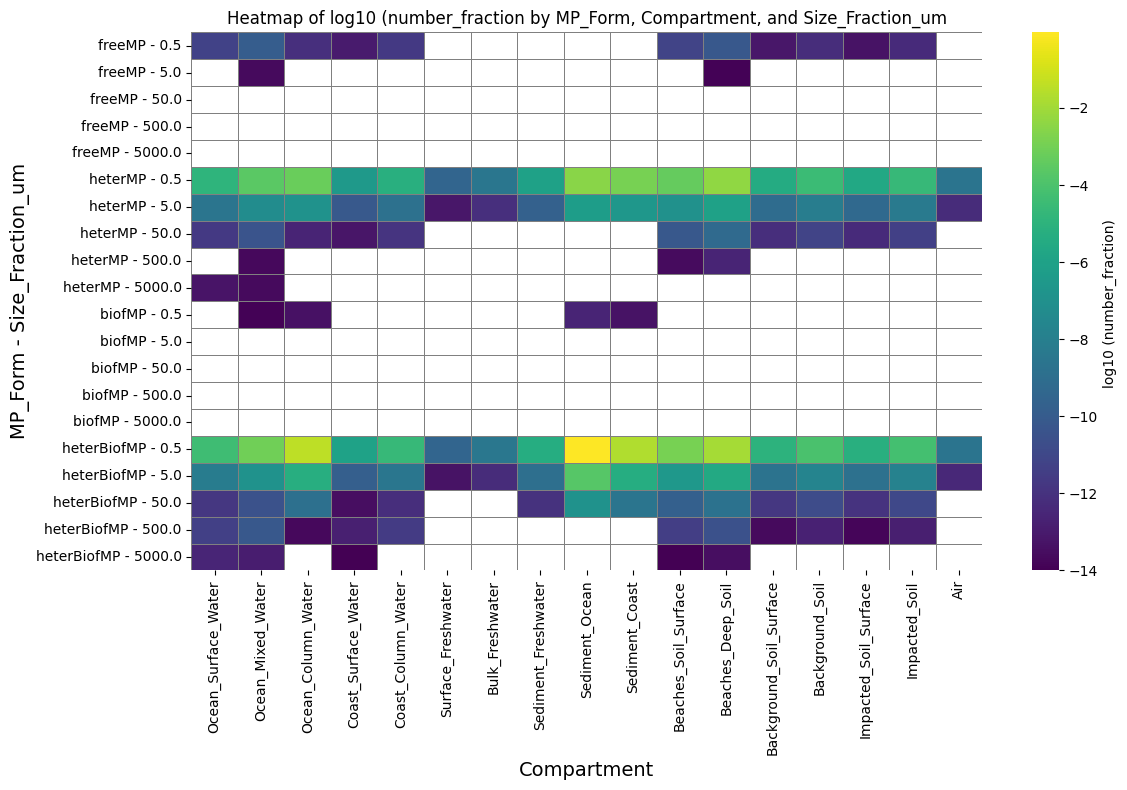

In [49]:
for fraction in ["mass_fraction", "number_fraction"]:
    plot_fractionDistribution_heatmaps_json(result_processed, fraction)

In [45]:
print(type(flow_document["flows_dict_mass"]))
print(flow_document["flows_dict_mass"])


<class 'dict'>
{'input_flows': {'Ocean_Surface_Water': [{'MP_size': 0.5, 'MP_form': 'freeMP', 'k_rising': 8.674156053043119e-12, 'k_mixing': 1.856759273817703e-05, 'k_advective_transport': 0.0, 'k_dry_deposition': 0.0, 'k_wet_deposition': 0.0}, {'MP_size': 5.0, 'MP_form': 'freeMP', 'k_rising': 1.7138741182560295e-10, 'k_mixing': 3.6686585343499833e-06, 'k_advective_transport': 0.0, 'k_dry_deposition': 0.0, 'k_wet_deposition': 0.0}, {'MP_size': 50.0, 'MP_form': 'freeMP', 'k_rising': 6.871718166232365e-10, 'k_mixing': 1.4709357722169743e-07, 'k_advective_transport': 0.0, 'k_dry_deposition': 0.0, 'k_wet_deposition': 0.0}, {'MP_size': 500.0, 'MP_form': 'freeMP', 'k_rising': 1.5174371858693692e-09, 'k_mixing': 3.2481725600386577e-09, 'k_advective_transport': 0.0, 'k_dry_deposition': 0.0, 'k_wet_deposition': 0.0}, {'MP_size': 5000.0, 'MP_form': 'freeMP', 'k_rising': 0.0001831240871601849, 'k_mixing': 3.919889670128631e-06, 'k_advective_transport': 0.0, 'k_dry_deposition': 0.0, 'k_wet_deposit

### Results by compartment